# Collecting Valid Points

In [1]:
import pandas as pd
from datetime import datetime, time, timedelta
import pathlib 
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
# We make new locations for the filtered files
# Link = pathlib.Path('/gws/nopw/j04/eo_shared_data_vol2/scratch')
import shutil

Link2 = pathlib.Path('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Signal&Mass/')

# # #file_list = os.listdir(str(Link2))
# # for file in file_list:
# #     print(file)
# #     new = 'LowerCounterFacDataAdvected'
# # Combine the folder path with the new folder name
new = 'Real'
new_folder_path = os.path.join(Link2, new)

# Check if the folder doesn't already exist, then create it
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
    print('Success')
else:
    print('Failure')
    
fileList = os.listdir(Link2)
for item in fileList:
    # new_folder_path = os.path.join(Link2, item)
    # shutil.rmtree(new_folder_path)
    print(item)
    


Success
LCF
Real
UCF


In [ ]:
StartDate = datetime(2019, 1, 3, 12, 0)
Link_Real = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealDataAdvected/{}_{}_{}_{}:{}'.format(str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
file = pd.read_csv(Link_Real)
file# = file[(file['cth'] >= 0.5) & (file['cth'] <= 2.5) & (file['cer'] >= 3) & (file['cot'] >= 0.5) & (file['cloud_type'] == 3) & (file['illum'] == 3)]
#file.sort_values(by = 'cer')#.tail(50)
file.info()

In [4]:
# In this cell, we filter data points first according to their individual values, and then we make sure that each real point has a corresponding
# sampling pointwe can pair it with. These files are then written to a folder. 
StartDate = datetime(2019, 1, 1, 0, 0)
EndDate   = datetime(2020, 1, 1, 0, 0)
RealCounter = FittedCounter = UCFCounter = LCFCounter = 0

while StartDate < EndDate:
    CounterFacsU = set()
    CounterFacsL = set()
    Real         = set()
    CommonPoints = set()
    RFNew = []
    UFNew = []
    LFNew = []
    try:
        Link_Real   = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealDataAdvected/{}_{}_{}_{}:{}'.format(str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
       # Link_Fitted = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/FittedDataAdvected/{}_{}_{}_{}:{}'.format(str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
        Link_UCF    = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/UpperCounterFacDataAdvected/{}_{}_{}_{}:{}'.format(str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
        Link_LCF    = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/LowerCounterFacDataAdvected/{}_{}_{}_{}:{}'.format(str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
        
        RF = pd.read_csv(Link_Real)
       # FF = pd.read_csv(Link_Fitted) 
        UF = pd.read_csv(Link_UCF)
        LF = pd.read_csv(Link_LCF)
        
    # Filtering based on our conditions
        #print('column names in RF = ', RF.columns)


        RF = RF[(RF["cer_uncertainty"] < 10) & (RF["cer"] > 0) & (RF["cer"] < 40) & (RF["illum"] != 2) & (RF["cot_uncertainty"] < 10) & 
                                    (RF["cot"] > 0) & (RF["cot"] < 30) & (RF["cwp_uncertainty"] < 10) & (RF["cwp"] > 0) & (RF["cwp"] < 100) & 
                                    (RF["cloud_type"] == 3) & (RF['cth'] > 0.5) & (RF['cth'] < 2.5) & (RF['cth_uncertainty'] < 2)]
                                    #& (~pd.isna(RF["Visible_Albedo"])) & (~pd.isna(RF["Albedo_Uncertainty"]))  
        UF = UF[(UF["cer_uncertainty"] < 10) & (UF["cer"] > 0) & (UF["cer"] < 40) & (UF["illum"] != 2) & (UF["cot_uncertainty"] < 10) & 
                                    (UF["cot"] > 0) & (UF["cot"] < 30) & (UF["cwp_uncertainty"] < 10) & (UF["cwp"] > 0) & (UF["cwp"] < 100) & 
                                    (UF["cloud_type"] == 3) &  (UF['cth'] > 0.5) & (UF['cth'] < 2.5) & (UF['cth_uncertainty'] < 2)]
                                    #& (~pd.isna(UF["Visible_Albedo"])) & (~pd.isna(UF["Albedo_Uncertainty"]))
        LF = LF[(LF["cer_uncertainty"] < 10) & (LF["cer"] > 0) & (LF["cer"] < 40) & (LF["illum"] != 2) & (LF["cot_uncertainty"] < 10) & 
                                    (LF["cot"] > 0) & (LF["cot"] < 30) & (LF["cwp_uncertainty"] < 10) & (LF["cwp"] > 0) & (LF["cwp"] < 100) & 
                                    (LF["cloud_type"] == 3) & (LF['cth'] > 0.5) & (LF['cth'] < 2.5) & (LF['cth_uncertainty'] < 2)]
                                    #& (~pd.isna(LF["Visible_Albedo"])) & (~pd.isna(LF["Albedo_Uncertainty"])) 

        for _, rowU in UF.iterrows():
            tupleU = (rowU['jday'], rowU['particle'])
            CounterFacsU.add(tupleU)
        for _, rowL in LF.iterrows(): 
            tupleL = (rowL['jday'], rowL['particle'])
            CounterFacsL.add(tupleL)
        for _, rowR in RF.iterrows():
            tupleR = (rowR['jday'], rowR['particle'])
            Real.add(tupleR)
            
        CommonCFs    = CounterFacsU.intersection(Real)
        CommonPoints = CounterFacsL.intersection(CommonCFs)
        
        for _, rowUF in UF.iterrows():
            tupleU = (rowUF['jday'], rowUF['particle'])
            if tupleU in CommonPoints:
                UFNew.append(rowUF) 
        for _, rowLF in LF.iterrows(): 
            tupleL = (rowLF['jday'], rowLF['particle'])
            if tupleL in CommonPoints:
                LFNew.append(rowLF) 
        for _, rowRE in RF.iterrows():
            tupleR = (rowRE['jday'], rowRE['particle'])
            if tupleR in CommonPoints:
                RFNew.append(rowRE)   
      
            
    # Keeping track of how many points we are actually getting 
        RealCounter   += len(RFNew)
       # FittedCounter += len(FF)
        UCFCounter    += len(UFNew)
        LCFCounter    += len(LFNew)
    # Adding to new locations subject to new constraints
        RFNewer = pd.DataFrame(RFNew)
        RFNewer.to_csv('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_Real/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2)))
       # FFNew.to_csv('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_Fitted/{}_{}_{}_{}:{}'.format(
       #         str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
       #         str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2)))
        UFNewer = pd.DataFrame(UFNew)
        UFNewer.to_csv('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_UCF/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2)))
        LFNewer = pd.DataFrame(LFNew)
        LFNewer.to_csv('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_LCF/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2)))
        if StartDate.hour % 23 == 0:
            print(f'Real = {RealCounter}, Upper = {UCFCounter}, Lower = {LCFCounter}')
        StartDate += timedelta(hours = 1) 
   # except (FileNotFoundError, KeyError) as e:
    #    print(f'Skipped concatenation for {StartDate} due to {e}')
    except Exception as e:
        print(f"An error occurred for {StartDate}: {e}")
        #traceback.print_exc() 
        print(f'Real = {RealCounter}, Upper = {UCFCounter}, Lower = {LCFCounter}')
        StartDate += timedelta(hours = 1)
print(f'Real = {RealCounter}, Upper = {UCFCounter}, Lower = {LCFCounter}')
        

Real = 299, Upper = 299, Lower = 299
Real = 4473, Upper = 4473, Lower = 4473
Real = 4619, Upper = 4619, Lower = 4619
Real = 7093, Upper = 7093, Lower = 7093
Real = 7239, Upper = 7239, Lower = 7239
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 00:00:00: [Errno 2] No such file or directory: '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/UpperCounterFacDataAdvected/2019_01_04_00:00'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 01:00:00: 'cer_uncertainty'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 02:00:00: 'cer_uncertainty'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 03:00:00: 'cer_uncertainty'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 04:00:00: 'cer_uncertainty'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2019-01-04 05:00:00: 'cer_uncertainty'
Real = 10095, Upper = 10095, Lower = 10095
An error occurred for 2

In [3]:
StartDate = datetime(2019, 2, 3, 1, 0)
Real_Link = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealDataAdvected/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
UCF_Link  = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_UCF/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
LCF_Link  = '/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/Cleaned_LCF/{}_{}_{}_{}:{}'.format(
                    str(StartDate.year), str(StartDate.month).zfill(2), str(StartDate.day).zfill(2),
                    str(StartDate.hour).zfill(2), str(StartDate.minute).zfill(2))
Real = pd.read_csv(Real_Link)
UCF  = pd.read_csv(UCF_Link)
LCF  = pd.read_csv(LCF_Link)
print(len(Real), len(UCF), len(LCF))
Real.sort_values(by = 'illum')

5259 72 72


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,particle,jday,lat,lon,alt,timestep,...,cer,cer_uncertainty,cwp,cwp_uncertainty,cth,cth_uncertainty,illum,cloud_type,Visible_Albedo,Albedo_Uncertainty
2629,2629,2629,84332,84332,429,2019-02-03 12:30:00,-21.508,9.706,12.1,11.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
2422,2422,2422,78739,78739,308,2019-02-03 11:45:00,-2.720,-7.718,14.1,10.8,...,9.98,1.02,23.0,3.0,2.92,0.18,1.0,3.0,0.1948,0.0145
2423,2423,2423,78741,78741,310,2019-02-03 11:45:00,-3.386,7.325,35.8,10.8,...,2.33,0.72,2.0,1.0,3.11,0.56,1.0,3.0,0.1157,0.0171
2424,2424,2424,78742,78742,311,2019-02-03 11:45:00,-3.712,7.745,17.2,10.8,...,3.81,0.61,6.0,2.0,1.50,0.40,1.0,3.0,0.1593,0.0130
2425,2425,2425,78744,78744,313,2019-02-03 11:45:00,-3.821,-14.792,24.6,10.8,...,4.98,0.50,10.0,2.0,3.03,0.14,1.0,3.0,0.2090,0.0197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,865,25951,25951,416,2019-02-03 04:30:00,-20.949,-13.392,24.3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN
866,866,866,25954,25954,419,2019-02-03 04:30:00,-20.989,6.820,20.2,3.5,...,6.59,2.22,22.0,11.0,1.07,0.12,3.0,2.0,NaN,NaN
867,867,867,25958,25958,423,2019-02-03 04:30:00,-21.800,6.329,20.6,3.5,...,4.30,1.73,7.0,4.0,1.12,0.14,3.0,2.0,NaN,NaN
889,889,889,27685,27685,326,2019-02-03 04:45:00,-7.878,-6.660,19.6,3.8,...,6.81,1.89,25.0,10.0,1.26,0.13,3.0,2.0,NaN,NaN


## Loading files into memory 

In [16]:
data_path = pathlib.Path("/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12")
Real_files = sorted(list((data_path/"Cleaned_Real").glob("2019_*"))) # find all files that start with "2019_"
#Fitted_files = sorted(list((data_path/"Cleaned_Fitted").glob("2019_*"))) # find all files that start with "2019_"
UCF_files = sorted(list((data_path/"Cleaned_UCF").glob("2019_*"))) # find all files that start with "2019_"
LCF_files = sorted(list((data_path/"Cleaned_LCF").glob("2019_*"))) # find all files that start with "2019_"

real_df   = pd.concat((pd.read_csv(f) for f in Real_files), ignore_index=True) 
#fitted_df = pd.concat((pd.read_csv(f) for f in Fitted_files), ignore_index=True) 
ucf_df    = pd.concat((pd.read_csv(f) for f in UCF_files), ignore_index=True) 
lcf_df    = pd.concat((pd.read_csv(f) for f in LCF_files), ignore_index=True) 

In [17]:
print(len(real_df), len(fitted_df), len(ucf_df), len(lcf_df))
#real_df.head(20)

3441493 5357643 2692726 2600903


In [ ]:
real_df.sort_values(by = 'cot').head(50000)

## Heat Maps

In [18]:
# First, we want a simple plot of cloud properties for the datasets
# Real
time_of_obs_real = pd.to_datetime(real_df["jday"], format='mixed')
timestep_real = np.round(real_df["timestep"] * 4) / 4
time_of_emission_real = time_of_obs_real - timestep_real.astype("timedelta64[h]")
# Fitted
time_of_obs_fitted = pd.to_datetime(fitted_df["jday"], format='mixed')
timestep_fitted = np.round(fitted_df["timestep"] * 4) / 4
time_of_emission_fitted = time_of_obs_fitted - timestep_fitted.astype("timedelta64[h]")
# Upper Counterfactual
time_of_obs_ucf = pd.to_datetime(ucf_df["jday"], format='mixed')
timestep_ucf = np.round(ucf_df["timestep"] * 4) / 4
time_of_emission_ucf = time_of_obs_ucf - timestep_ucf.astype("timedelta64[h]")
# Lower Counterfactual
time_of_obs_lcf = pd.to_datetime(lcf_df["jday"], format='mixed')
timestep_lcf = np.round(lcf_df["timestep"] * 4) / 4
time_of_emission_lcf = time_of_obs_lcf - timestep_lcf.astype("timedelta64[h]")

In [60]:
# Real
wh_cer_valid_real = np.logical_and.reduce([real_df["cer_uncertainty"] < 10, real_df["cer"] > 0, real_df["cer"] < 40,  real_df["illum"] == 1])
cer_bins_real = stats.binned_statistic_2d(
    time_of_emission_real.dt.hour[wh_cer_valid_real], timestep_real[wh_cer_valid_real], real_df["cer"][wh_cer_valid_real], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cot_valid_real = np.logical_and.reduce([real_df["cot_uncertainty"] < 10, real_df["cot"] > 0, real_df["cot"] < 40,  real_df["illum"] == 1])
cot_bins_real = stats.binned_statistic_2d(
    time_of_emission_real.dt.hour[wh_cot_valid_real], timestep_real[wh_cot_valid_real], real_df["cot"][wh_cot_valid_real], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cwp_valid_real = np.logical_and.reduce([real_df["cwp_uncertainty"] < 10, real_df["cwp"] > 0, real_df["cwp"] < 40])
cwp_bins_real = stats.binned_statistic_2d(
    time_of_emission_real.dt.hour[wh_cwp_valid_real], timestep_real[wh_cwp_valid_real], real_df["cwp"][wh_cwp_valid_real], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)

In [59]:
# Fitted
wh_cer_valid_fitted = np.logical_and.reduce([fitted_df["cer_uncertainty"] < 10, fitted_df["cer"] > 0, fitted_df["cer"] < 40,  fitted_df["illum"] == 1]) 
cer_bins_fitted = stats.binned_statistic_2d(
    time_of_emission_fitted.dt.hour[wh_cer_valid_fitted], timestep_fitted[wh_cer_valid_fitted], fitted_df["cer"][wh_cer_valid_fitted], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cot_valid_fitted = np.logical_and.reduce([fitted_df["cot_uncertainty"] < 10, fitted_df["cot"] > 0, fitted_df["cot"] < 40,  fitted_df["illum"] == 1]) 
cot_bins_fitted = stats.binned_statistic_2d(
    time_of_emission_fitted.dt.hour[wh_cot_valid_fitted], timestep_fitted[wh_cot_valid_fitted], fitted_df["cot"][wh_cot_valid_fitted], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cwp_valid_fitted = np.logical_and.reduce([fitted_df["cwp_uncertainty"] < 10, fitted_df["cwp"] > 0, fitted_df["cwp"] < 40]) 
cwp_bins_fitted = stats.binned_statistic_2d(
    time_of_emission_fitted.dt.hour[wh_cwp_valid_fitted], timestep_fitted[wh_cwp_valid_fitted], fitted_df["cwp"][wh_cwp_valid_fitted], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)

In [58]:
# Upper Counterfactual
wh_cer_valid_ucf = np.logical_and.reduce([ucf_df["cer_uncertainty"] < 10, ucf_df["cer"] > 0, ucf_df["cer"] < 40, ucf_df["illum"] == 1])
cer_bins_ucf = stats.binned_statistic_2d(
    time_of_emission_ucf.dt.hour[wh_cer_valid_ucf], timestep_ucf[wh_cer_valid_ucf], ucf_df["cer"][wh_cer_valid_ucf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cot_valid_ucf = np.logical_and.reduce([ucf_df["cot_uncertainty"] < 10, ucf_df["cot"] > 0, ucf_df["cot"] < 40, ucf_df["illum"] == 1])
cot_bins_ucf = stats.binned_statistic_2d(
    time_of_emission_ucf.dt.hour[wh_cot_valid_ucf], timestep_ucf[wh_cot_valid_ucf], ucf_df["cot"][wh_cot_valid_ucf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cwp_valid_ucf = np.logical_and.reduce([ucf_df["cwp_uncertainty"] < 10, ucf_df["cwp"] > 0, ucf_df["cwp"] < 40])
cwp_bins_ucf = stats.binned_statistic_2d(
    time_of_emission_ucf.dt.hour[wh_cwp_valid_ucf], timestep_ucf[wh_cwp_valid_ucf], ucf_df["cwp"][wh_cwp_valid_ucf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)

In [57]:
# Lower Counterfactual
wh_cer_valid_lcf = np.logical_and.reduce([lcf_df["cer_uncertainty"] < 10, lcf_df["cer"] > 0, lcf_df["cer"] < 40, lcf_df["illum"] == 1]) 
cer_bins_lcf = stats.binned_statistic_2d(
    time_of_emission_lcf.dt.hour[wh_cer_valid_lcf], timestep_lcf[wh_cer_valid_lcf], lcf_df["cer"][wh_cer_valid_lcf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cot_valid_lcf = np.logical_and.reduce([lcf_df["cot_uncertainty"] < 10, lcf_df["cot"] > 0, lcf_df["cot"] < 40, lcf_df["illum"] == 1]) 
cot_bins_lcf = stats.binned_statistic_2d(
    time_of_emission_lcf.dt.hour[wh_cot_valid_lcf], timestep_lcf[wh_cot_valid_lcf], lcf_df["cot"][wh_cot_valid_lcf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)
wh_cwp_valid_lcf = np.logical_and.reduce([lcf_df["cwp_uncertainty"] < 10, lcf_df["cwp"] > 0, lcf_df["cwp"] < 40]) 
cwp_bins_lcf = stats.binned_statistic_2d(
    time_of_emission_lcf.dt.hour[wh_cwp_valid_lcf], timestep_lcf[wh_cwp_valid_lcf], lcf_df["cwp"][wh_cwp_valid_lcf], 
    bins=[np.linspace(0,24,25), np.linspace(0,24,25)], 
    statistic=np.nanmean
)

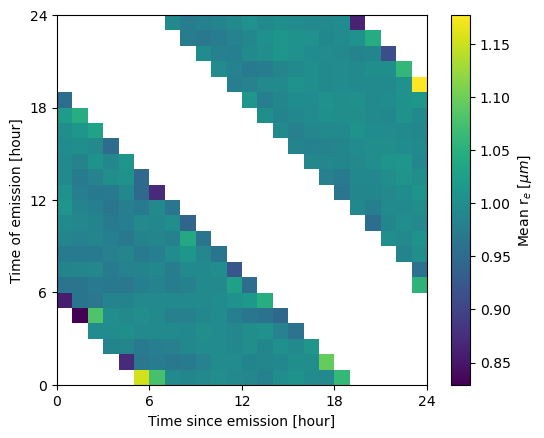

In [66]:
cer_real   = cer_bins_real.statistic
cot_real   = cot_bins_real.statistic
cwp_real   = cwp_bins_real.statistic

cer_fitted = cer_bins_fitted.statistic
cot_fitted = cot_bins_fitted.statistic
cwp_fitted = cwp_bins_fitted.statistic

cer_ucf    = cer_bins_ucf.statistic
cot_ucf    = cot_bins_ucf.statistic
cwp_ucf    = cwp_bins_ucf.statistic

cer_lcf    = cer_bins_lcf.statistic
cot_lcf    = cot_bins_lcf.statistic
cwp_lcf    = cwp_bins_lcf.statistic

signal = cer_real / (0.5 * (cer_ucf + cer_lcf))

plt.figure()
plt.imshow(signal, extent=(0,24,24,0))
plt.colorbar(label="Mean r$_{e}$ [$\mu m$]")
plt.xticks(np.linspace(0,24,5))
plt.xlabel("Time since emission [hour]")
plt.yticks(np.linspace(0,24,5))
plt.ylabel("Time of emission [hour]")
plt.gca().invert_yaxis()

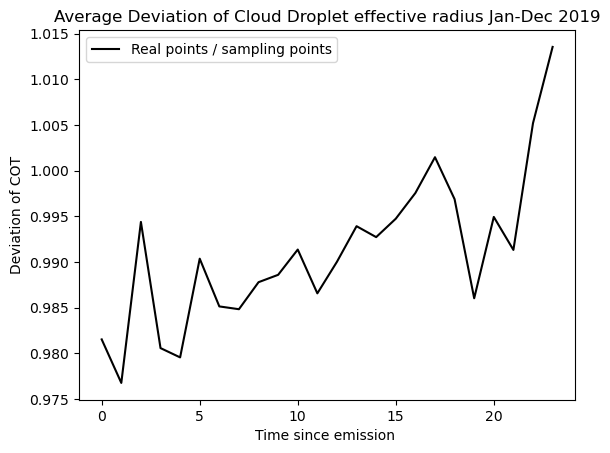

In [67]:
average_residual_cer = np.nanmean(signal, axis=0)

# Plot the average of each column
plt.plot(average_residual_cer, color='black', label='Real points / sampling points')
plt.xlabel('Time since emission ')
plt.ylabel('Deviation of COT')
#plt.xticks(np.linspace(0, 24, 25))
plt.title('Average Deviation of Cloud Droplet effective radius Jan-Dec 2019')
plt.legend()
plt.show()

In [27]:
print(len(wh_cer_valid_lcf), len(wh_cer_valid_ucf), len(wh_cer_valid_real), len(wh_cer_valid_fitted))
print(len(ucf_df), len(ucf_df), len(real_df), len(fitted_df))

5347819 5395914 5345493 5357643
5395914 5395914 5345493 5357643
